Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Радует, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Отлично, что тебе удалось освоить внутренний метод кодировки признаков для одной из моделей.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Привет! Спасибо за комментарии. Исправил.
</div>

### <font color='orange'>Общее впечатление (ревью 2)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Удачи в дальнейшем обучении и следующих работах!

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from catboost import Pool, CatBoostRegressor, cv
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [2]:
autos = pd.read_csv('/datasets/autos.csv')
display(autos.head())
display(autos.info())

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

In [3]:
for column in autos.columns:
    print(f'Процент пропусков в столбце {column} = {autos[column].isna().sum()/autos[column].shape[0]}')

Процент пропусков в столбце DateCrawled = 0.0
Процент пропусков в столбце Price = 0.0
Процент пропусков в столбце VehicleType = 0.1057936783409384
Процент пропусков в столбце RegistrationYear = 0.0
Процент пропусков в столбце Gearbox = 0.055967085156997366
Процент пропусков в столбце Power = 0.0
Процент пропусков в столбце Model = 0.055605879746817584
Процент пропусков в столбце Kilometer = 0.0
Процент пропусков в столбце RegistrationMonth = 0.0
Процент пропусков в столбце FuelType = 0.09282696849893755
Процент пропусков в столбце Brand = 0.0
Процент пропусков в столбце NotRepaired = 0.20079070121822168
Процент пропусков в столбце DateCreated = 0.0
Процент пропусков в столбце NumberOfPictures = 0.0
Процент пропусков в столбце PostalCode = 0.0
Процент пропусков в столбце LastSeen = 0.0


In [4]:
for column in autos.columns:
    print(f'Уникальные данные в столбце {column}: {autos[column].unique()}')
    print('-----------------------\n-----------------------')

Уникальные данные в столбце DateCrawled: ['2016-03-24 11:52:17' '2016-03-24 10:58:45' '2016-03-14 12:52:21' ...
 '2016-03-21 09:50:58' '2016-03-14 17:48:27' '2016-03-19 18:57:12']
-----------------------
-----------------------
Уникальные данные в столбце Price: [  480 18300  9800 ... 12395 18429 10985]
-----------------------
-----------------------
Уникальные данные в столбце VehicleType: [nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']
-----------------------
-----------------------
Уникальные данные в столбце RegistrationYear: [1993 2011 2004 2001 2008 1995 1980 2014 1998 2005 1910 2016 2007 2009
 2002 2018 1997 1990 2017 1981 2003 1994 1991 1984 2006 1999 2012 2010
 2000 1992 2013 1996 1985 1989 2015 1982 1976 1983 1973 1111 1969 1971
 1987 1986 1988 1970 1965 1945 1925 1974 1979 1955 1978 1972 1968 1977
 1961 1960 1966 1975 1963 1964 5000 1954 1958 1967 1959 9999 1956 3200
 1000 1941 8888 1500 2200 4100 1962 1929 1957 1940 3000 2066 1949 2019
 1937 1951 180

В столбце RegistrationYear есть несуществующие года регистрации.
В столбце RegistrationMonth есть "нулевой" месяц, что не правильно.
В столбце Power есть некорректные значения.

Выделил важные признаки, которые влияют на стоимость: 

* VehicleType
* RegistrationYear
* Gearbox
* Power
* Model
* Kilometer
* FuelType
* Brand
* NotRepaired

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно, первичный осмотр проведен.
</div>

In [5]:
#создал df с нужными столбцами
df = autos[['VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model', 'Kilometer', 'FuelType', 'Brand', 'NotRepaired', 'Price']]
display(df.head())
display(df.info())

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,Price
0,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN,480
1,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes,18300
2,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN,9800
3,small,2001,manual,75,golf,150000,petrol,volkswagen,no,1500
4,small,2008,manual,69,fabia,90000,gasoline,skoda,no,3600


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   VehicleType       316879 non-null  object
 1   RegistrationYear  354369 non-null  int64 
 2   Gearbox           334536 non-null  object
 3   Power             354369 non-null  int64 
 4   Model             334664 non-null  object
 5   Kilometer         354369 non-null  int64 
 6   FuelType          321474 non-null  object
 7   Brand             354369 non-null  object
 8   NotRepaired       283215 non-null  object
 9   Price             354369 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 27.0+ MB


None

<div class="alert alert-block alert-success">
<b>Успех:</b> Согласен, что даты, константный признак и индек нам не нужны.
</div>

Так как во всех столбцах, кроме 'NotRepaired', процент пропущенных значений меньше или равно 1%, то их можно удалить.
В столбце 'NotRepaired' для всех NaN установим значение 'yes'.

В столбце 'Power' есть нереальные значения. Их нужно будет удалить. Также и для столбца 'RegistrationYear'.

In [6]:
df.fillna({'NotRepaired':'yes'}, inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [7]:
df = df.dropna()

<div class="alert alert-block alert-success">
<b>Успех:</b> Обработать пропуски таким образом – хорошее решение.
</div>

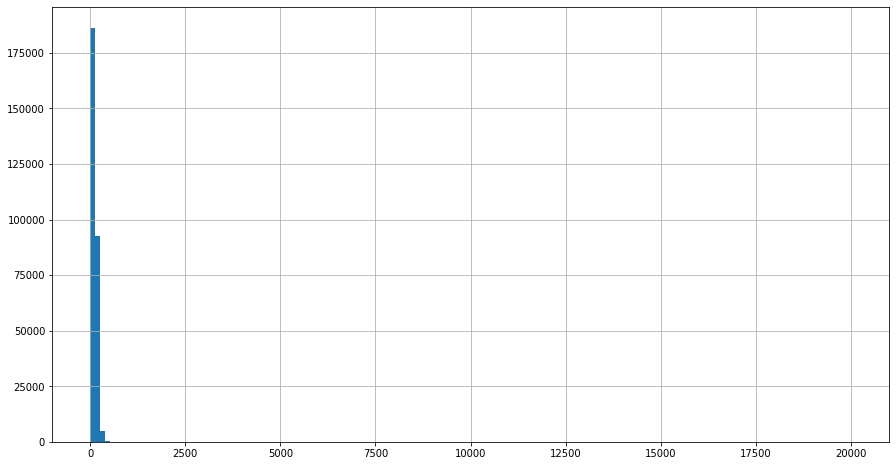

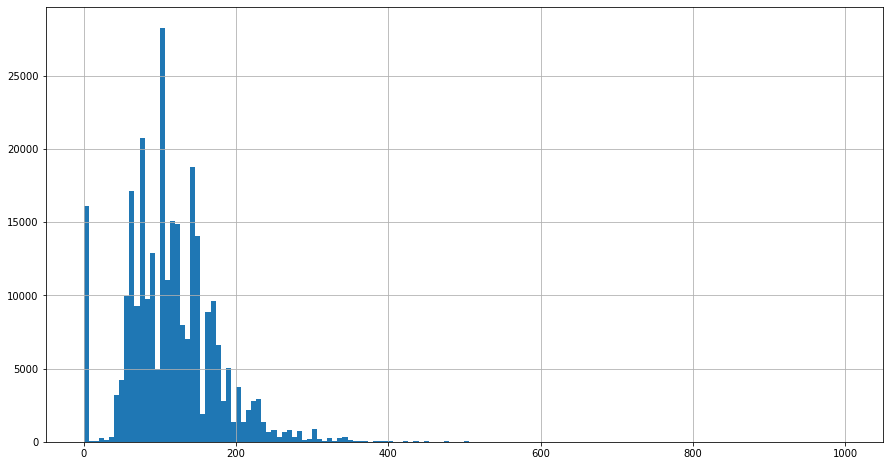

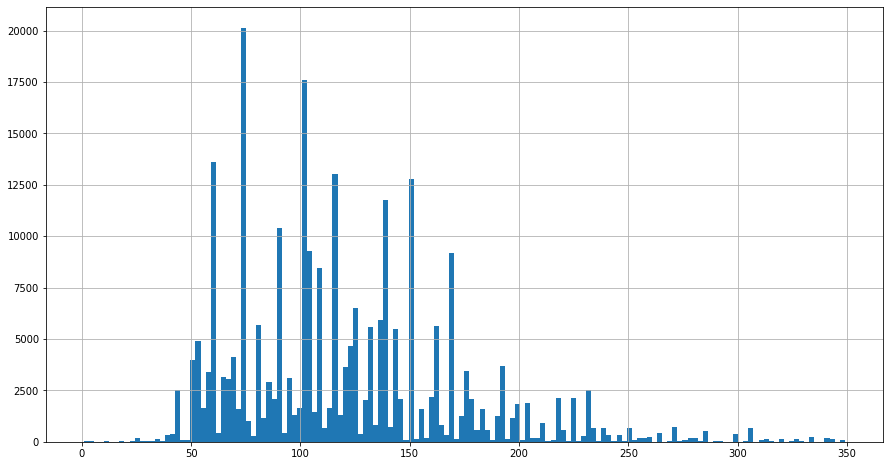

In [8]:
#Убираю нереальные значения в 'Power'.
df['Power'].hist(bins=150,figsize=(15,8))
plt.show()

df = df.query('Power < 1000')
df['Power'].hist(bins=150, figsize=(15,8))
plt.show()

df = df.query('0 < Power < 350')
df['Power'].hist(bins=150, figsize=(15,8))
plt.show()

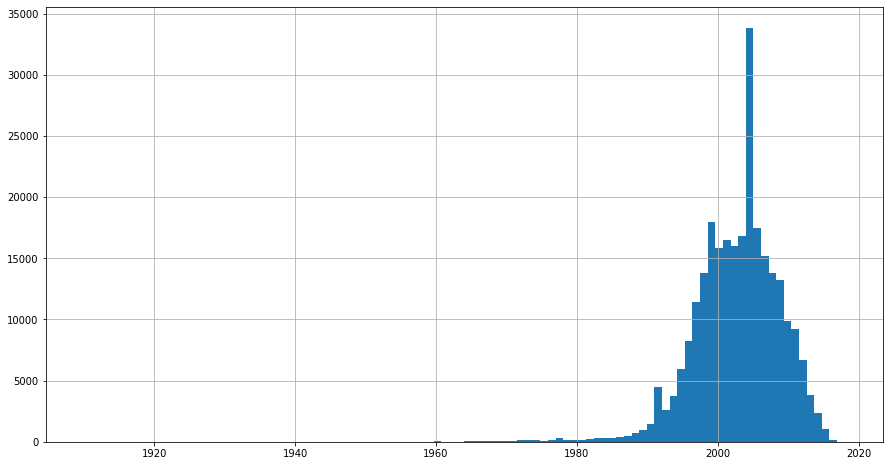

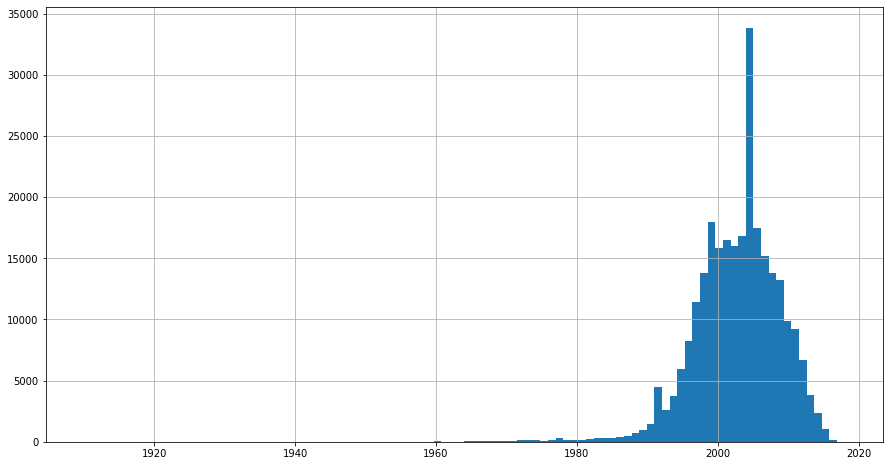

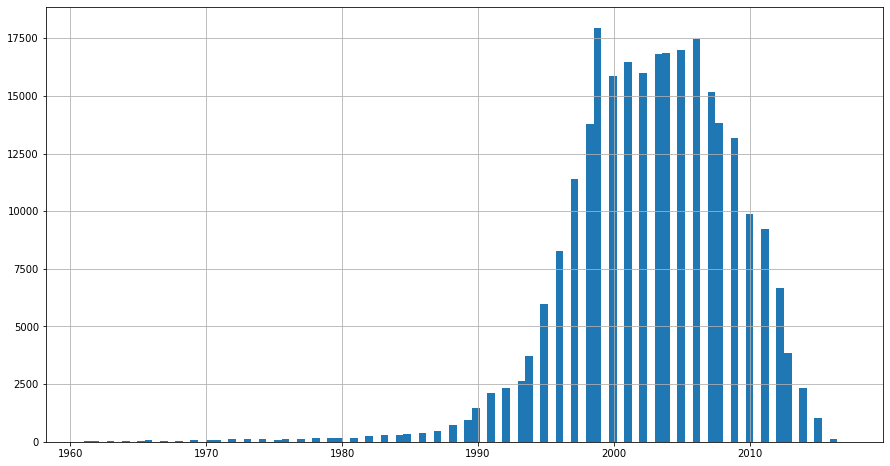

In [9]:
#аналогично и для 'RegistrationYear'
df['RegistrationYear'].hist(bins=100, figsize=(15,8))
plt.show()

df = df.query('1900 < RegistrationYear < 2021')
df['RegistrationYear'].hist(bins=100, figsize=(15,8))
plt.show()

df = df.query('1960 < RegistrationYear < 2018')
df['RegistrationYear'].hist(bins=100, figsize=(15,8))
plt.show()

In [10]:
#IsManualGearbox. 1 - manual. 0 - auto.
#IsNotRepaired. 1  - машина без ремонта. 0 - с ремонтом.

df['Gearbox_bool'] = 0
df.loc[df['Gearbox'] == 'manual', 'Gearbox_bool'] = 1


df['NotRepaired_bool'] = 0
df.loc[df['NotRepaired'] == 'yes', 'NotRepaired_bool'] = 1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267002 entries, 2 to 354368
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   VehicleType       267002 non-null  object
 1   RegistrationYear  267002 non-null  int64 
 2   Gearbox           267002 non-null  object
 3   Power             267002 non-null  int64 
 4   Model             267002 non-null  object
 5   Kilometer         267002 non-null  int64 
 6   FuelType          267002 non-null  object
 7   Brand             267002 non-null  object
 8   NotRepaired       267002 non-null  object
 9   Price             267002 non-null  int64 
 10  Gearbox_bool      267002 non-null  int64 
 11  NotRepaired_bool  267002 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 26.5+ MB


In [12]:
df.drop(['NotRepaired','Gearbox'], inplace=True, axis=1)

In [13]:
#работаю с целевым признаком.
df['Price'].value_counts()

0        4172
1500     3824
500      3641
2500     3233
1200     3193
         ... 
3965        1
11897       1
5246        1
6783        1
8188        1
Name: Price, Length: 3487, dtype: int64

<AxesSubplot:>

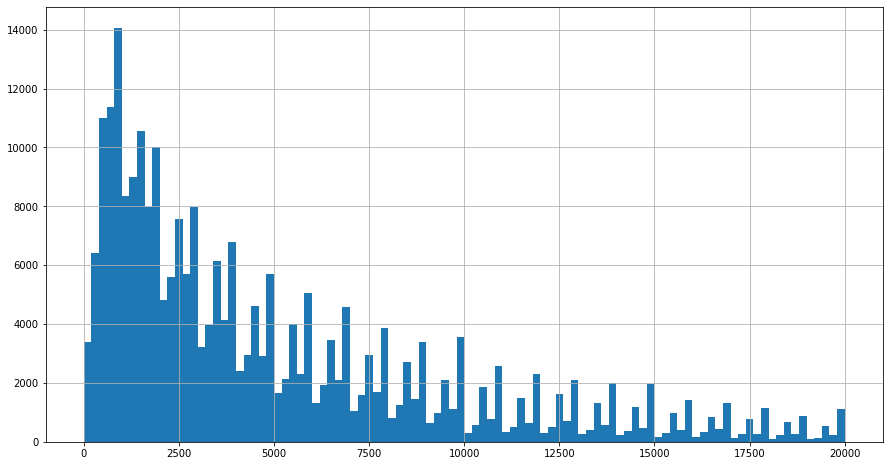

In [14]:
df = df.query('Price > 0')
df['Price'].hist(bins=100, figsize=(15,8))

In [15]:
#Выделил квантили 5% и 95%.
df['Price'].quantile([0.05, 0.95])

0.05      500.0
0.95    15200.0
Name: Price, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238092 entries, 2 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   VehicleType       238092 non-null  object
 1   RegistrationYear  238092 non-null  int64 
 2   Power             238092 non-null  int64 
 3   Model             238092 non-null  object
 4   Kilometer         238092 non-null  int64 
 5   FuelType          238092 non-null  object
 6   Brand             238092 non-null  object
 7   Price             238092 non-null  int64 
 8   Gearbox_bool      238092 non-null  int64 
 9   NotRepaired_bool  238092 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 20.0+ MB


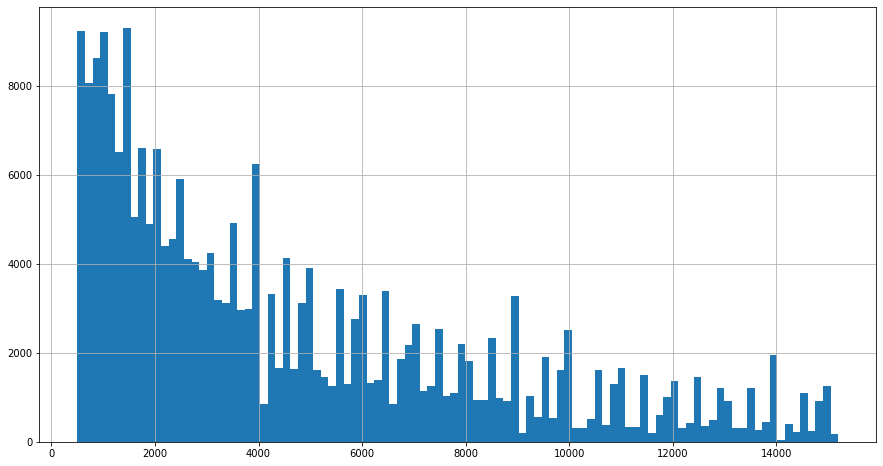

In [16]:
df = df.query('500 <= Price <= 15200')
df['Price'].hist(bins=100, figsize=(15,8))
df.info()

### Вывод
Создал df с нужными столбцами.
Изучил и подготовил данные: в столбце 'NotRepaired' заменил NaN на 'yes' и удалил нереальные значения в столбцах 'Power' и RegistrationYear'. Также удалил строки, у которых процент пропусков меньше 1%. И выделил цены на авто.

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо, что распределения были визуализирвоаны и аномалии были обработаны!
</div>

## Обучение моделей

Выберем следующие модели:

* LinearRegression
* CatBoostRegressor
* LGBMRegressor

In [17]:
features = df.drop('Price', axis=1)
target = df['Price']


#Прямое кодирование
encoder = OrdinalEncoder()
cat_columns = ['VehicleType','FuelType','Brand','Model']
cat_features = features[cat_columns]
cat_features = pd.DataFrame(encoder.fit_transform(cat_features),
                                columns=cat_features.columns, 
                                index=cat_features.index)
ordinal_features = features.copy()
for column in cat_columns:
    ordinal_features[column] = cat_features[column]

#OHE кодирование
ohe_features = pd.get_dummies(features, drop_first=True)



features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=123)

ordinal_features_train = ordinal_features.loc[features_train.index, :]
ordinal_features_test = ordinal_features.loc[features_test.index, :]

ohe_features_train = ohe_features.loc[features_train.index, :]
ohe_features_test = ohe_features.loc[features_test.index, :]


<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично!
</div>

In [18]:
%%time
#Линейная регрессия

model_linearReg = LinearRegression()

RMSE_LR = (cross_val_score(model_linearReg, 
                             ohe_features_train, 
                             target_train, 
                             cv=5, 
                             scoring='neg_mean_squared_error').mean() * -1) ** 0.5
print(RMSE_LR)

2093.312371788886
CPU times: user 45 s, sys: 14.1 s, total: 59.2 s
Wall time: 59.1 s


In [19]:
%%time
#CatBoost

model_cat = CatBoostRegressor(learning_rate=0.3,
                              iterations = 100,
                              random_state=123, 
                              verbose=False, 
                              cat_features=['VehicleType','FuelType','Brand','Model']) 

RMSE_cat = (cross_val_score(model_cat,
                                features_train, 
                                target_train, 
                                cv=5, 
                                scoring='neg_mean_squared_error').mean() * -1) ** 0.5
print(RMSE_cat)


1427.009201720885
CPU times: user 21.3 s, sys: 28.5 ms, total: 21.3 s
Wall time: 24.5 s


In [20]:
%%time
#LGBMRegressor

model_LGBM = LGBMRegressor() 
hyperparams = [{'num_leaves':[50, 100, 150], 
                'learning_rate':[0.1, 0.3, 0.5],
                'random_state':[12345]}]


clf = GridSearchCV(model_LGBM, hyperparams, scoring='neg_mean_squared_error')
clf.fit(ordinal_features_train, target_train)

print(clf.best_params_)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.6f for %r"% ((mean*-1)** 0.5, params))
print()

RMSE_LGBMR = (max(means)*-1) ** 0.5
print(RMSE_LGBMR)

{'learning_rate': 0.3, 'num_leaves': 150, 'random_state': 12345}
1405.182309 for {'learning_rate': 0.1, 'num_leaves': 50, 'random_state': 12345}
1369.032444 for {'learning_rate': 0.1, 'num_leaves': 100, 'random_state': 12345}
1354.154832 for {'learning_rate': 0.1, 'num_leaves': 150, 'random_state': 12345}
1366.508022 for {'learning_rate': 0.3, 'num_leaves': 50, 'random_state': 12345}
1346.489061 for {'learning_rate': 0.3, 'num_leaves': 100, 'random_state': 12345}
1341.571611 for {'learning_rate': 0.3, 'num_leaves': 150, 'random_state': 12345}
1370.549548 for {'learning_rate': 0.5, 'num_leaves': 50, 'random_state': 12345}
1363.571555 for {'learning_rate': 0.5, 'num_leaves': 100, 'random_state': 12345}
1366.649713 for {'learning_rate': 0.5, 'num_leaves': 150, 'random_state': 12345}

1341.5716107883106
CPU times: user 4min 32s, sys: 1.94 s, total: 4min 34s
Wall time: 4min 38s


<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Пожалуйста, хотя бы для одной из моделей реализуй подбор параметров.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Сделал выше.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Отлично, спасибо!
</div>

## Анализ моделей

In [28]:
%%time
#Линейная регрессия

model = LinearRegression()
model.fit(ohe_features_train, target_train)

CPU times: user 14.2 s, sys: 7.78 s, total: 21.9 s
Wall time: 21.9 s


LinearRegression()

In [29]:
%%time
target_predict = model.predict(ohe_features_test)

final_RMSE_LR = mean_squared_error(target_test, target_predict) ** 0.5
print(final_RMSE_LR)

2078.6934493458825
CPU times: user 125 ms, sys: 135 ms, total: 261 ms
Wall time: 220 ms


In [30]:
%%time
#CatBoost

model = CatBoostRegressor(learning_rate=0.3, 
                          iterations = 100, 
                          random_state=123, 
                          verbose=False,
                          cat_features=['VehicleType','FuelType','Brand','Model']) 
model.fit(features_train, target_train)

CPU times: user 5.71 s, sys: 45.7 ms, total: 5.75 s
Wall time: 6.42 s


In [31]:
%%time
target_predict = model.predict(features_test)

final_RMSE_Cat = mean_squared_error(target_test, target_predict) ** 0.5
print(final_RMSE_Cat)

1413.8373004714847
CPU times: user 59.2 ms, sys: 0 ns, total: 59.2 ms
Wall time: 56.7 ms


In [32]:
%%time
#LGBMRegressor
model = LGBMRegressor(learning_rate=0.3, 
                      num_leaves=150, 
                      random_state=12345)
model.fit(ordinal_features_train, target_train)

CPU times: user 1min 5s, sys: 254 ms, total: 1min 5s
Wall time: 1min 6s


LGBMRegressor(learning_rate=0.3, num_leaves=150, random_state=12345)

In [33]:
%%time
target_predict = model.predict(ordinal_features_test)

final_RMSE_LGBM = mean_squared_error(target_test, target_predict) ** 0.5
print(final_RMSE_LGBM)

1321.3075912687189
CPU times: user 529 ms, sys: 1.5 ms, total: 530 ms
Wall time: 502 ms


In [35]:
index = ['LinearRegression',
         'CatBoost',
         'LGBMRegressor']

data = {'Time of learning, sec':[21.9, 6.42, 66], 'Time of prediction, sec':[0.22, 0.056, 0.502], 'RMSE':[2078.69, 1413.84, 1321.31]}

result = pd.DataFrame(data=data, index=index)
result

,"Time of learning, sec","Time of prediction, sec",RMSE
LinearRegression,21.90,0.220,2078.69
CatBoost,6.42,0.056,1413.84
LGBMRegressor,66.00,0.502,1321.31


<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно было разбить время на части (обучение/предсказание). Все показатели(время обучения, время предсказания и качество) желательно было собрать в одной таблице. Так было бы проще сравнивать.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Сделал выше.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Молодец!
</div>

## Вывод

В начале работы я создал df с нужными столбцами. Изучил и подготовил данные.

После выбрал следующие модели:
* LinearRegression
* CatBoostRegressor
* LGBMRegressor

Лучшей моделью оказалась: LGBMRegressor

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть вывод в конце проекта!
</div>

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнена загрузка и подготовка данных
- [ ]  Выполнено обучение моделей
- [ ]  Есть анализ скорости работы и качества моделей